# SIMULACIÓN | PROYECTO1_BARRIENTOS_BUSTAMANTE




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: 9 de noviembre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes: Maria Barrientos - Reinaldo Bustamante** 

In [269]:

# Pandas and numpy for data manipulation
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [229]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (0,8 pts) En este contexto, defina 3 eventos de interés A, B y C, y por medio de la simulación calcule: 
    
    (a) ${P(A)}$, ${P(B)}$, ${P(C)}$ 
    
    (b) ${P(A \cup B)}$ 

    (c) ${P(A \cap C)}$

Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$



2. (0,6 pts) Defina una probabilidad condicional no independiente y calcúlela por medio de la simulación considerando el teorema de Bayes. Escriba la formulación del teorema aplicado a su caso (Prob. Cond, a priori, verosimilitud y evidencia). 



#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [195]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0, pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [196]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [197]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[146.20525046190363, 100, 53.794749538096376, 100]
[146.20525046190363, 98.64147666532266, 53.794749538096376, 101.35852333467734]
[146.20525046190363, 21.549214907902154, 130.88701129551688, 101.35852333467734]
[139.2517204433968, 21.549214907902154, 130.88701129551688, 108.31205335318415]
[21.005396209630025, 139.79553914166894, 130.88701129551688, 108.31205335318415]
[131.6054566974445, 139.79553914166894, 20.286950807702407, 108.31205335318415]
[38.58937989176281, 232.81161594735062, 20.286950807702407, 108.31205335318415]
[68.25424405824506, 232.81161594735062, 20.286950807702407, 78.6471891867019]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [198]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.0   55   75  100  126  148
 20,000 0.49  96.6    1   11   71  230  441
 40,000 0.50  99.8    1   11   70  231  454
 60,000 0.50 100.7    1   10   69  230  467
 80,000 0.50  98.7    1   11   71  229  461
100,000 0.50  99.8    1   11   68  229  466
120,000 0.50 101.5    1   11   70  233  480
140,000 0.49  98.2    1   11   70  230  443
160,000 0.50  99.6    1   11   69  231  457
180,000 0.50 100.8    1   10   69  229  473
200,000 0.50 100.2    1   11   69  227  461


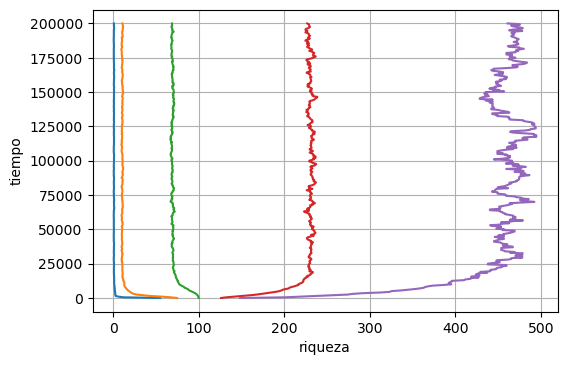

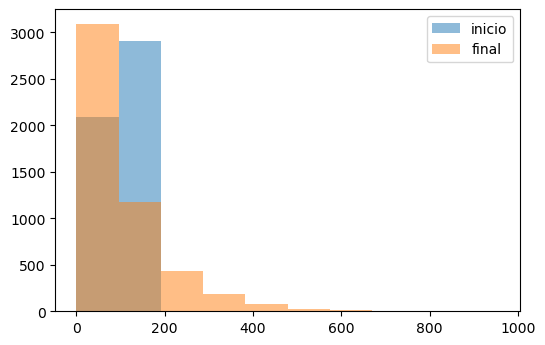

In [199]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos de una variable aleatoria. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio: https://archive.ics.uci.edu/ml/datasets.php . 

0. Indique la fuente de sus datos. 


1. (0,6 pts) Descripcion de datos: tome un conjunto de datos en ${\cal R}$ y descríbalo estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (0,8 pts) Seleccione aleatoriamente una cantidadN de sus datos y calcule sus estadísticos muestrales (al menos 3), luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (0,8 pts) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,6 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (0,8 pts) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Desarrollo

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Parte I : Propiedades de las Probabilidades

**Definicion de eventos**

**1.a)**

**1.b)**

**1.c)**

**2)**

## Parte II: Distribuciones 

**Fuente de datos a utilizar**

In [200]:
abalone = pd.read_csv('data/abalone.data')


In [201]:
abalone

,Sexo,Largo(mm),Diametro(mm),Alto(mm),Peso entero(g),Peso sin concha(g),Peso visceras(g),Peso cascara(g),anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Los datos utilizados seran acerca de los abalotes, estos son unos moluscos perteneciente a la familia de moluscos gasteropodos.  
A continuacion ocuparemos la columna Peso entero(g) para realizar el siguiente analisis  

link: https://archive.ics.uci.edu/ml/datasets/Abalone

**1)**

**Descripcion de datos**

In [202]:
datos = abalone['Peso entero(g)']

In [203]:
datos.describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Peso entero(g), dtype: float64

**Histograma**

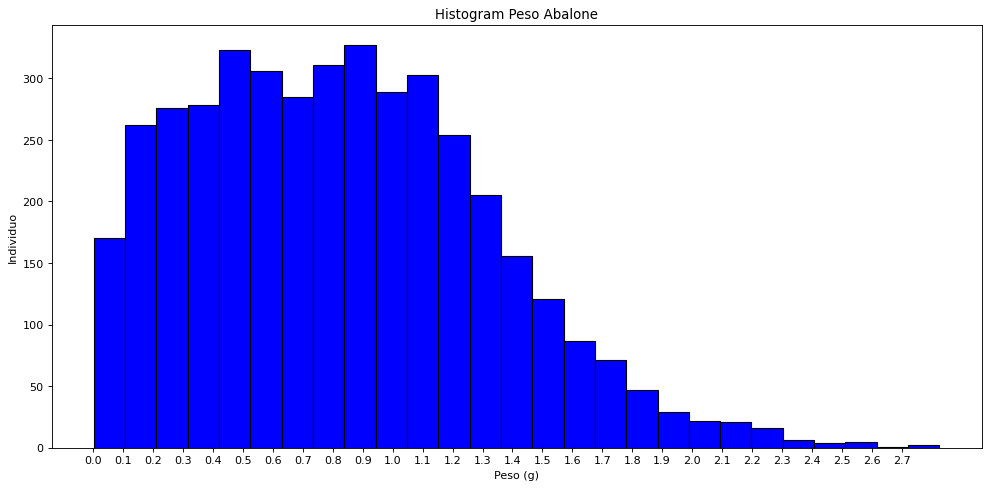

In [290]:
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

# Make the histogram using matplotlib, bins must be integet
ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))

plt.title('Histogram Peso Abalone')
plt.xlabel('Peso (g)'); plt.ylabel('Individuo');
plt.xticks(np.arange(0, 2.8, 0.1))

plt.show()

Podemos ver que este histograma se parece a la distribucion lognormal. por lo cual ocuparemos esta distribucion como referencia 

**Distribucion de probabilidad empirica**

(0.28548767209391646, -0.8975435734124296, 1.6581029536112977)


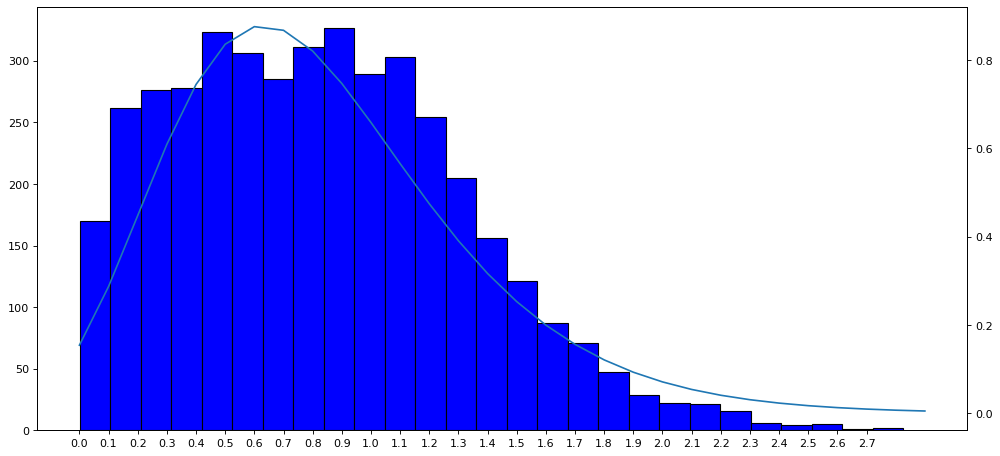

In [320]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))
ax2 = ax.twinx()
args_temp = scipy.stats.lognorm.fit(datos)
print(args)
vec = np.arange(0, 3, 0.1)

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args_temp[0],scale=args_temp[2],loc=args_temp[1]))
ax2.plot(vec,pvec)
plt.xticks(np.arange(0, 2.8, 0.1))
plt.draw()



**2)**

**Muestra aleatoria**

In [284]:
def muestra_aleatoria(x):
    n = random.randint(1,len(datos))
    nueva_muestra = datos[:n]
    return nueva_muestra

In [285]:
aleatoria = muestra_aleatoria(datos)
aleatoria

0       0.5140
1       0.2255
2       0.6770
3       0.5160
4       0.2050
         ...  
1356    0.8895
1357    0.9595
1358    1.2380
1359    0.9755
1360    0.9025
Name: Peso entero(g), Length: 1361, dtype: float64

**Calculo estadisticos**

In [286]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(aleatoria)/len(aleatoria)
curtos = stats.kurtosis(aleatoria)
asim = stats.skew(aleatoria)
print('esperanza empírica:',promedio)
print('curtosis:',curtos)
print('asimetria:',asim)

esperanza empírica: 0.7476884643644378
curtosis: 0.5156966034926378
asimetria: 0.7379028661613319


**3)**

**4)**

**5)**

## Parte III: Conclusiones



**1)**

**2)**